In [1]:
# 기본 설정
library(IRdisplay)
library(repr)
options(repr.plot.width=8, repr.plot.height=6)

# 세종문화회관 공연정보 수집하기
$$ $$
* 서울 열린데이터 광장<"http://data.seoul.go.kr">에서 세종문화회관 공연 및 전시 정보를 제공하고 있습니다. 
$$ $$
* 오픈API로 제공되고 있으므로 '인증키'를 먼저 발급받으셔야 합니다. 

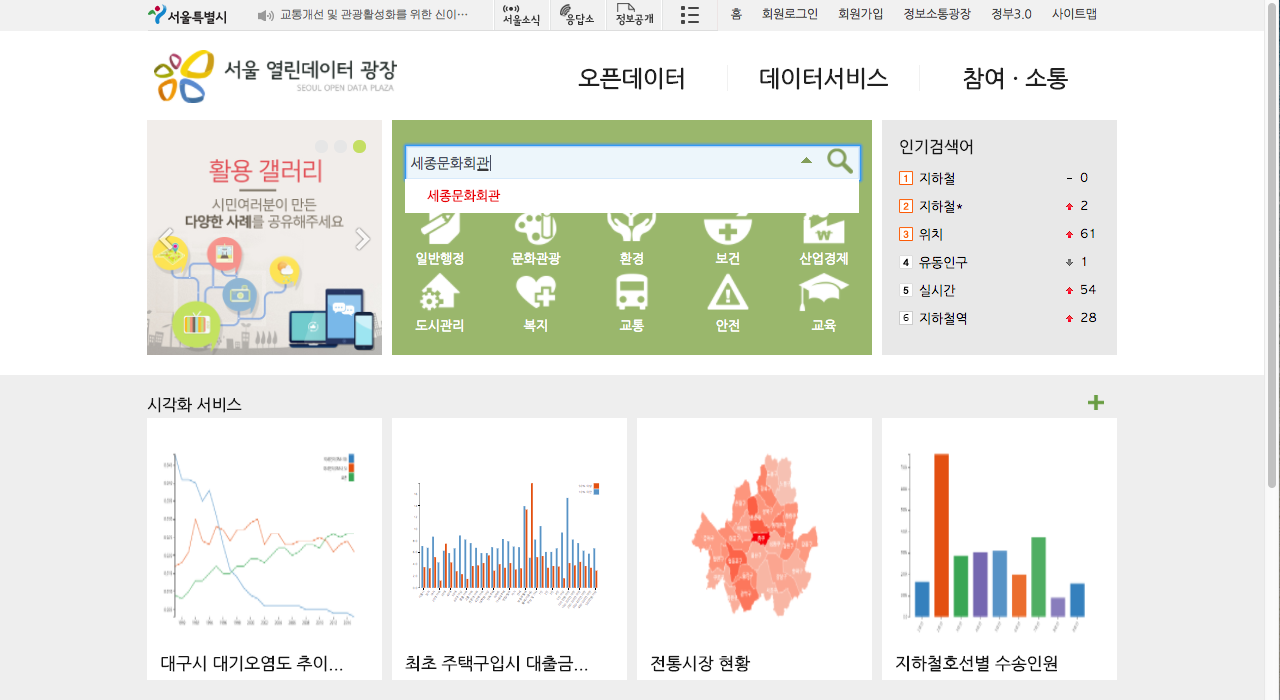

In [2]:
# 서울 열린데이터 광장에 접속 후, 회원가입 및 로그인을 합니다. 
# 상단 검색창에 "세종문화회관"을 입력합니다. 
display_png(file="../../../Analytics/PublicData/Image/서울데이터광장 인증키 발급_1.png")

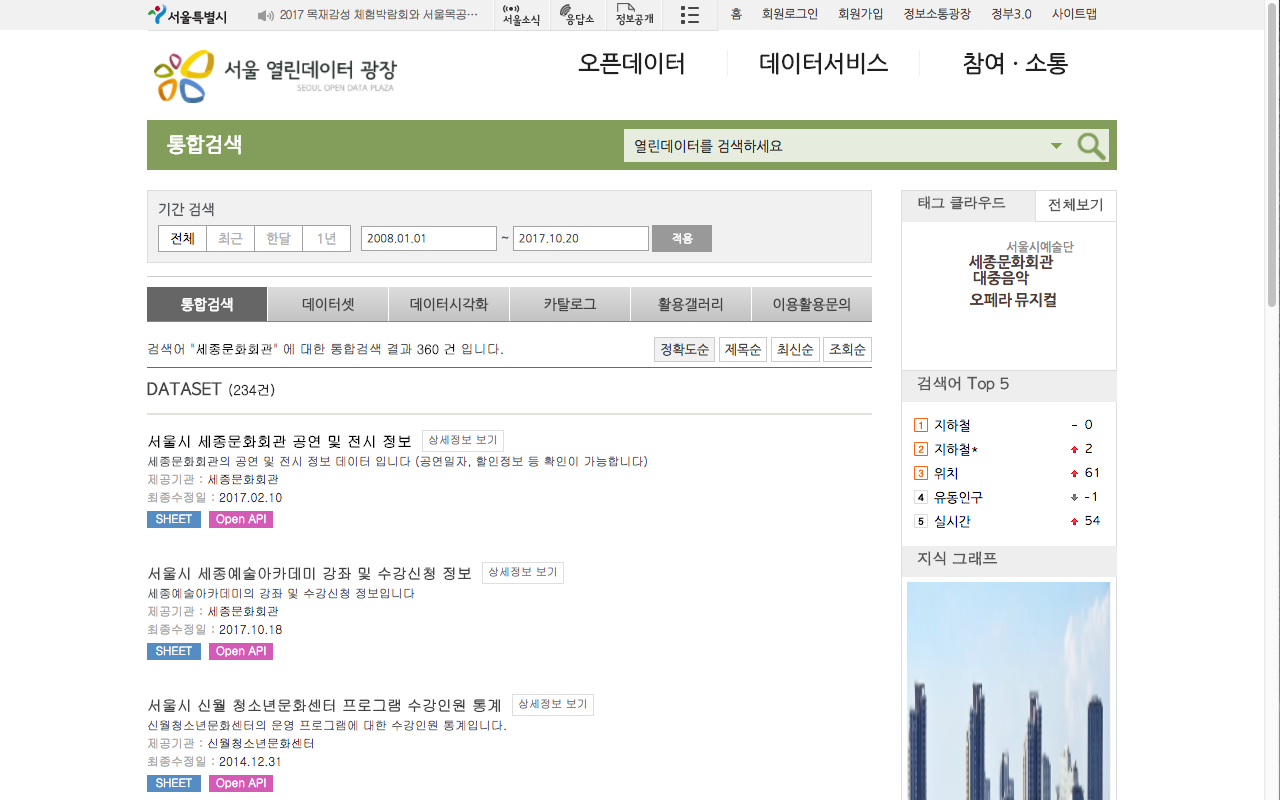

In [3]:
# "서울시 세종문화회관 공연 및 전시 정보"를 클릭합니다.
display_png(file="../../../Analytics/PublicData/Image/서울데이터광장 인증키 발급_2.png")

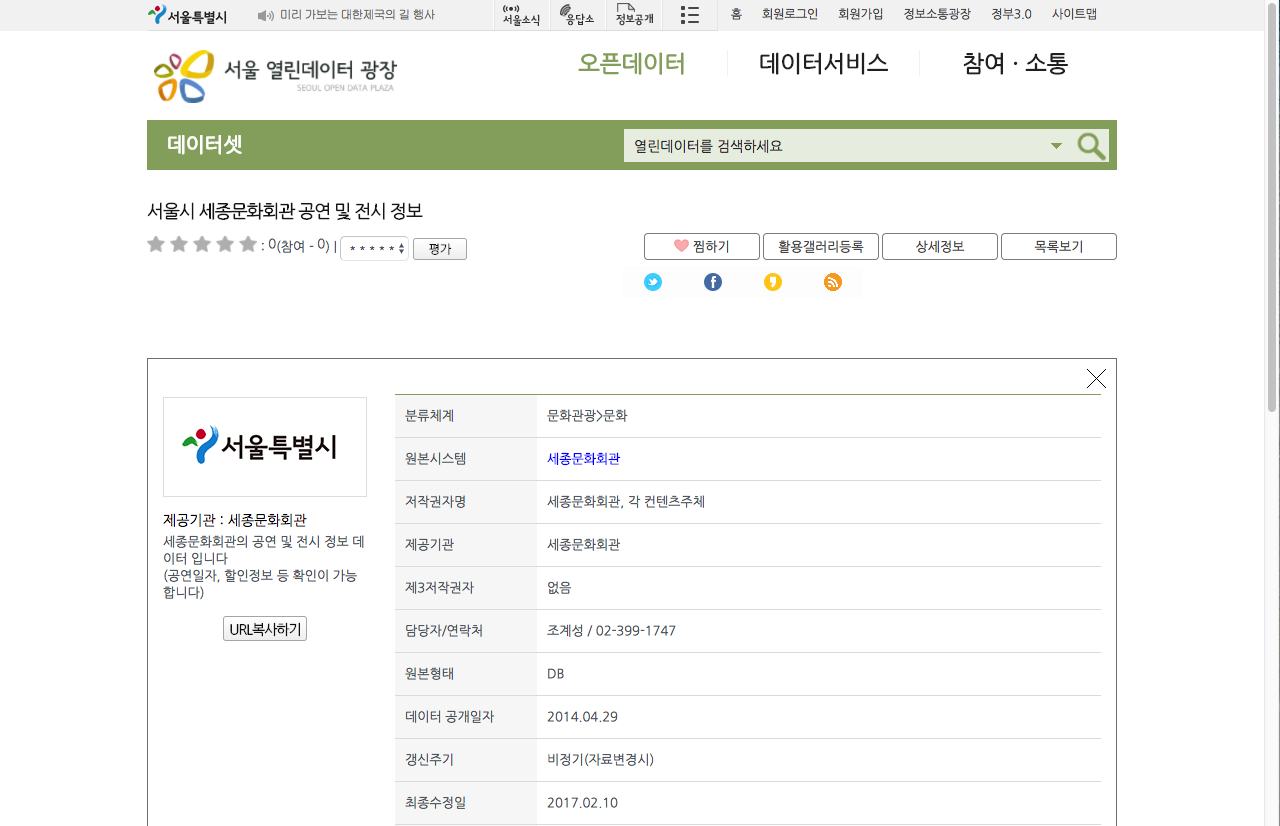

In [4]:
# 우측 상단 메뉴 중 "상세정보"를 클릭합니다.
display_png(file="../../../Analytics/PublicData/Image/서울데이터광장 인증키 발급_3.png")

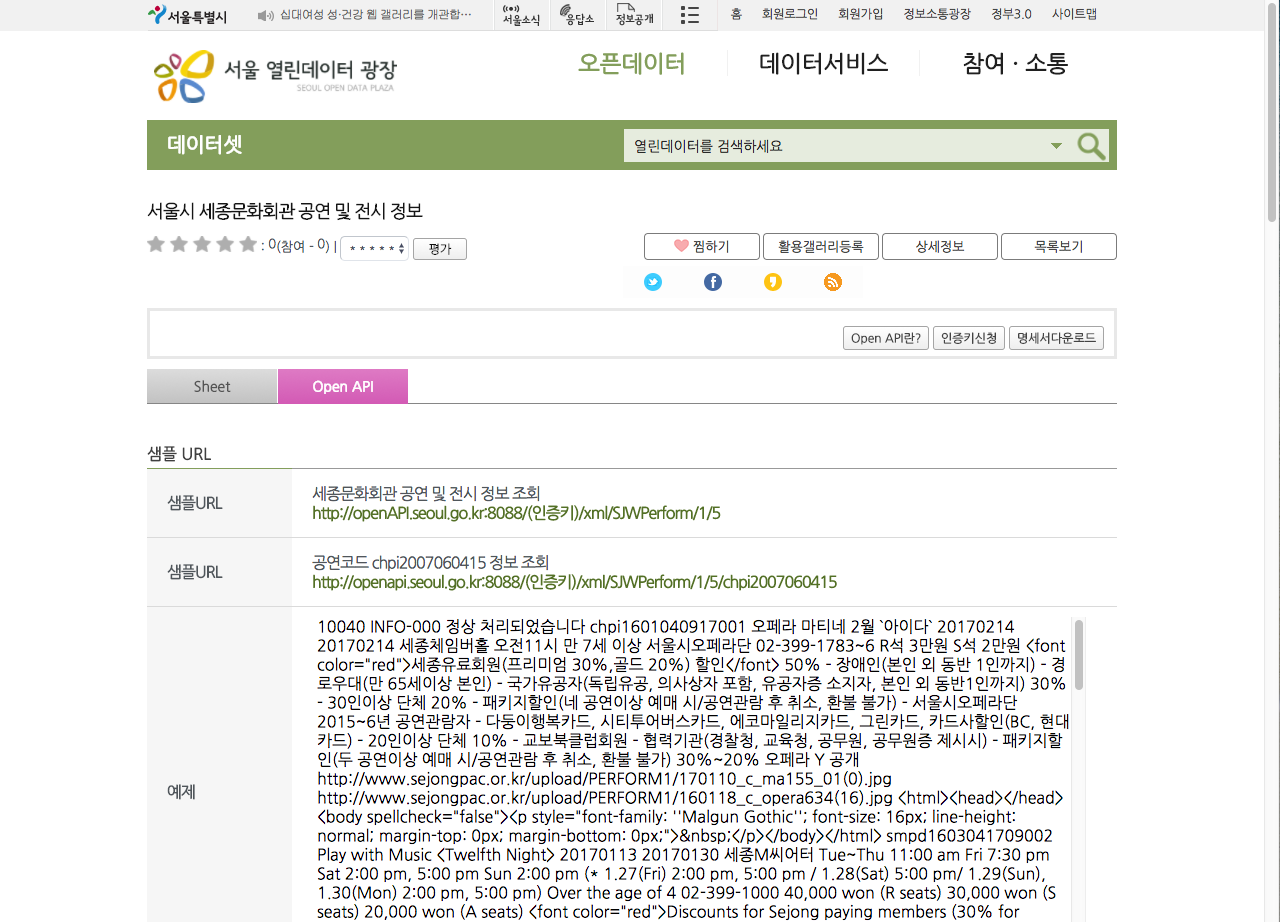

In [5]:
# 좌측 상단 메뉴 중 "Open API"를 클릭합니다. 
# 그리고 우측의 작은 메뉴 중 "인증키신청"을 클릭합니다. 
display_png(file="../../../Analytics/PublicData/Image/서울데이터광장 인증키 발급_4.png")

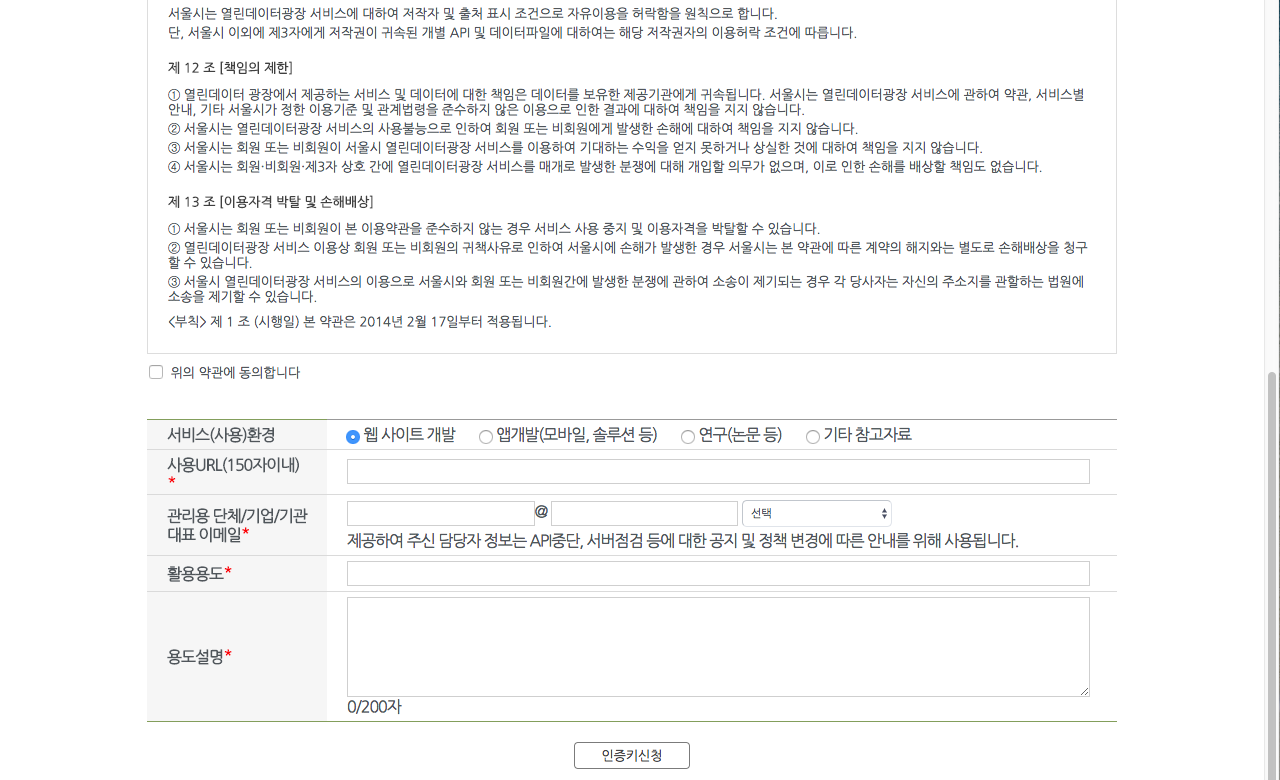

In [6]:
# 바뀐 화면을 맨 밑으로 쭉 내리면 다음과 같은 신청서 입력란이 나옵니다. 
# 약관 동의 체크 및 4가지 항목을 간략하게 기입 후 "인증키신청"을 클릭합니다. 
display_png(file="../../../Analytics/PublicData/Image/서울데이터광장 인증키 발급_5.png")

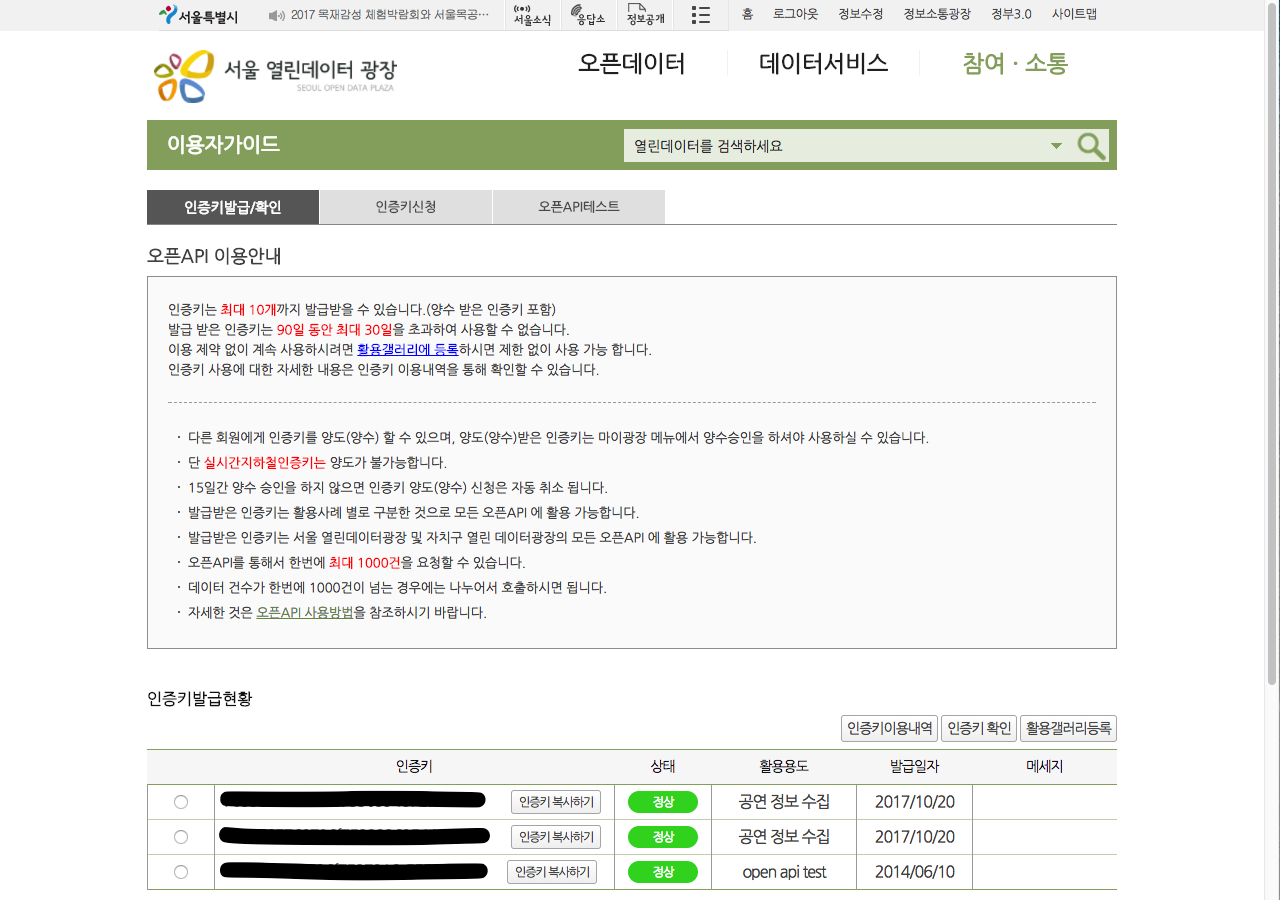

In [7]:
# 아래 표에 인증키를 확인할 수 있습니다. 
display_png(file="../../../Analytics/PublicData/Image/서울데이터광장 인증키 발급_6.png")

In [8]:
# 필요한 라이브러리를 불러옵니다. 
library(httr)
library(rvest)
library(dplyr)
library(stringr)

Loading required package: xml2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [9]:
# url 구성요소로는 공통부분, 인증키, 요청파일타입, 서비스명, 요청시작위치, 요청종료위치 등입니다. 
# 요청시작위치와 요청종료위치를 조절해가면서 전체 데이터를 수집할 수 있습니다. 
# 최대 1000건만 조회 요청이 가능합니다. 이번 예제에서는 100건으로 설정합니다. 
main <- "http://openAPI.seoul.go.kr:8088"
api_key <- "여기에 인증키를 입력하세요"
type <- "xml"
service <- "SJWPerform"
strIdx <- "1"
endIdx <- "100"

In [10]:
api_key <- "5644795769726f75333362544e556d"

In [11]:
# url을 조립합니다. 
url <- paste(main, api_key, type, service, strIdx, endIdx, sep="/")

In [12]:
# url로 요청합니다. 
resp <- GET(url)

# 요청상태가 정상(200)입니다.
resp$status_code

# 인코딩을 확인합니다. 
resp$headers$`content-type`

[1] 200

[1] "application/xml;charset=UTF-8"

In [13]:
# resp 객체의 content를 텍스트로 추출하여 구조를 파악합니다. 
# 만약 encoding이 'EUC-KR'이면, content() 인자로 endcoding="EUC-KR"을 추가합니다. 
xmlObj <- content(resp, as="text")
cat(xmlObj)

# 전체 공연정보는 10,040건이 제공됨을 알 수 있습니다. 
# 개별 공연정보는 "row" 하위 노드로 반복되고 있습니다. 

<?xml version="1.0" encoding="UTF-8"?>
<SJWPerform>
<list_total_count>10040</list_total_count>
<RESULT>
<CODE>INFO-000</CODE>
<MESSAGE>정상 처리되었습니다</MESSAGE>
</RESULT>
<row>
<PERFORM_CODE>chpi1601040917001</PERFORM_CODE>
<TITLE>오페라 마티네 2월 `아이다`</TITLE>
<START_DATE>20170214</START_DATE>
<END_DATE>20170214</END_DATE>
<PLACE_NAME>세종체임버홀</PLACE_NAME>
<PLAY_TIME>오전11시</PLAY_TIME>
<AGE>만 7세 이상</AGE>
<PLAN_COMPANY/>
<INQUIRY_PHONE>서울시오페라단 02-399-1783~6</INQUIRY_PHONE>
<INQUIRY_EMAIL/>
<TICKET_INFO>R석 3만원
S석 2만원</TICKET_INFO>
<DISCOUNT_INFO>&lt;font color="red"&gt;세종유료회원(프리미엄 30%,골드 20%) 할인&lt;/font&gt;

50%
- 장애인(본인 외 동반 1인까지)
- 경로우대(만 65세이상 본인)
- 국가유공자(독립유공, 의사상자 포함, 유공자증 소지자, 본인 외 동반1인까지)

30%
- 30인이상 단체 

20%
- 패키지할인(네 공연이상 예매 시/공연관람 후 취소, 환불 불가)
- 서울시오페라단 2015~6년 공연관람자
- 다둥이행복카드, 시티투어버스카드, 에코마일리지카드, 그린카드, 카드사할인(BC, 현대카드)
- 20인이상 단체

10%
- 교보북클럽회원
- 협력기관(경찰청, 교육청, 공무원, 공무원증 제시시)
- 패키지할인(두 공연이상 예매 시/공연관람 후 취소, 환불 불가)</DISCOUNT_INFO>
<DISCOUNT_CHARGED>30%~20%</DISCOUNT_CHARGED>
<GENRE_NAME>오페라

In [14]:
# 이제 XML을 불러옵니다. 
xml <- read_xml(resp)

# 공연정보 목록을 rows에 할당합니다. 
rows <- xml %>% xml_nodes('row')
rows

# 100개의 공연정보가 제공되었습니다. 

{xml_nodeset (100)}
 [1] <row>\n  <PERFORM_CODE>chpi1601040917001</PERFORM_CODE>\n  <TITLE>오페라 마티 ...
 [2] <row>\n  <PERFORM_CODE>smpd1603041709002</PERFORM_CODE>\n  <TITLE>Play w ...
 [3] <row>\n  <PERFORM_CODE>smpd1512211704001</PERFORM_CODE>\n  <TITLE>쉽게 보는  ...
 [4] <row>\n  <PERFORM_CODE>chpi1601040911001</PERFORM_CODE>\n  <TITLE>오페라 마티 ...
 [5] <row>\n  <PERFORM_CODE>chpi1601181107001</PERFORM_CODE>\n  <TITLE>오페라 마티 ...
 [6] <row>\n  <PERFORM_CODE>grpi1601041707001</PERFORM_CODE>\n  <TITLE>2017 세 ...
 [7] <row>\n  <PERFORM_CODE>grpi1601071541002</PERFORM_CODE>\n  <TITLE>2017 S ...
 [8] <row>\n  <PERFORM_CODE>chpi1604212114001</PERFORM_CODE>\n  <TITLE>종무식</T ...
 [9] <row>\n  <PERFORM_CODE>grpv1601071535002</PERFORM_CODE>\n  <TITLE>New Ye ...
[10] <row>\n  <PERFORM_CODE>grpc1512172101001</PERFORM_CODE>\n  <TITLE>송년제야콘서 ...
[11] <row>\n  <PERFORM_CODE>chpi1604212113001</PERFORM_CODE>\n  <TITLE>임하영 귀국 ...
[12] <row>\n  <PERFORM_CODE>grpi1512151522001</PERFORM_CODE>\n  <TITLE>로맨틱 콘서 

In [15]:
# 데이터 항목의 텍스트를 수집하는 사용자 정의 함수를 생성합니다. 
getXmlText <- function(x, var) {
    result <- x %>% xml_node(var) %>% xml_text()
    return(result)
}

In [16]:
# 공연명의 텍스트 데이터만 확인합니다. 
getXmlText(rows, "TITLE")

[1] "오페라 마티네 2월 `아이다`"                               
  [2] "Play with Music <Twelfth Night>"                          
  [3] "쉽게 보는 셰익스피어 시리즈 Ⅱ-가족음악극 `십이야`"       
  [4] "오페라 마티네 1월 `박쥐`"                                 
  [5] "오페라 마티네 1월 `박쥐`"                                 
  [6] "2017 세종문화회관 신년음악회"                             
  [7] "2017 Sejong Center New Year’s Concert"                   
  [8] "종무식"                                                   
  [9] "New Year’s Eve Concert"                                  
 [10] "송년제야콘서트"                                           
 [11] "임하영 귀국 첼로 독주회"                                  
 [12] "로맨틱 콘서트"                                            
 [13] "함윤미 정혜욱 피아노 조인트 리사이틀"                     
 [14] "Romantic Concert"                                         
 [15] "Geumsijo"                                                 
 [16] "서울시국악관현악단 제331회 금시조"                        
 [17] "201６ 음악춘추 우수신인 데뷔 연주회"                      
 [18] "2016 크리스마스 콘서트"                                   
 [19] "이시대의 아름다운 싱어송 라이터"                          
 [20] "론 브랜튼의 재즈 크리스마스!"                             
 [21] "Cantata <Prince and Christmas>"                           
 [22] "칸타타 `왕자와 크리스마스`"                               
 [23] "2016년 12월 온쉼표 '예로부터 전해오는 겨울소리 '"         
 [24] "우리악기의 재발견 Another Dream"                          
 [25] "오페라 마티네 `돈 파스콸레`"                              
 [26] "2016 Opera Matinee`Don Pasquale`"                         
 [27] "Opera Gala for Children and Youth"                        
 [28] "Rediscovery of our musical instruments `Another Dream`"   
 [29] "어린이와 청소년을 위한 오페라 갈라 `돈 파스콸레`"         
 [30] "한경챔버오케스트와 함께하는 송년갈라페스티벌"             
 [31] "음악동인 `명(鳴)` 제3회 작품발표회"                       
 [32] "세종CEO합창단정기연주회"                                  
 [33] "송년그랜드오페라갈라"                                     
 [34] "Masterpiece Chorus Series"                                
 [35] "Love Classic of Dec."                                     
 [36] "서울시합창단 제144회 정기연주회 `합창 명곡 시리즈`"       
 [37] "송효정 귀국 피아노 독주회"                                
 [38] "세기가 바뀔 무렵의 예술가곡시리즈 3  Sop.김반디 독창회"   
 [39] "카즈미 타테이시 트리오"                                   
 [40] "새빛낮은예술단"                                           
 [41] "소프라노 정희경 독창회"                                   
 [42] "박인미 피아노 독주회"                                     
 [43] "Hundertwasser"                                            
 [44] "훈데르트바서의 그린시티"                                  
 [45] "프렐류드의 2016 Merry Jazz Christmas"                     
 [46] "피아니스트 김현정의 어울림"                               
 [47] "우리춤배틀-더토핑"                                        
 [48] "제8회 곽재영 가야금 독주회"                               
 [49] "Dance Battle-The Topping"                                 
 [50] "채경주 피아노 독주회"                                     
 [51] "2017 한글일일달력전"                                      
 [52] "리베르테 스트링 콰르텟 제4회 정기연주회"                  
 [53] "무대점검일"                                               
 [54] "문화톡콘서트"                                             
 [55] "한국 최초 여성작곡가 김순애 서거 10주년 추모음악회"       
 [56] "Musical <The Moon of Seoul>"                              
 [57] "오소라 피아노 독주회"                                     
 [58] "전국학생 뮤지컬공연대회"                                  
 [59] "서울의달"                                                 
 [60] "소프라노 조주현 귀국 독창회"                              
 [61] "제4회N.M.C정기연주회 오페라 춘희"                         
 [62] "가일 플레이어즈 정기연주회"                               
 [63] "소프라노 전귀희 귀국 독창회"                              
 [64] "민효인 귀국 피아노 독주회"                                
 [65] "4인의 기타리스트"                                         
 [66] "2016 가을향기 가득담은 희망.나눔콘서트"                   
 [67] "제91회 이탈리아 가곡연구회 정기연주회"                    
 [68] "오페라 `맥베드`"                                          
 [69] "김효영 생황 독주회 `5개의 조우`"                          
 [70] "Opera `Macbeth`"                                          
 [71] "[

In [17]:
# 필요한 데이터 항목을 가지고 데이터프레임을 생성합니다. 
performs <- data.frame(공연코드 = getXmlText(rows, "PERFORM_CODE"),
                       공연명 = getXmlText(rows, "TITLE"),
                       시작일 = getXmlText(rows, "START_DATE"),
                       종료일 = getXmlText(rows, "END_DATE"),
                       공연장 = getXmlText(rows, "PLACE_NAME"),
                       공연시간 = getXmlText(rows, "PLAY_TIME"),
                       입장가능 = getXmlText(rows, "AGE"),
                       문의전화 = getXmlText(rows, "INQUIRY_PHONE"),
                       공연가격 = getXmlText(rows, "TICKET_INFO"),
                       할인정보 = getXmlText(rows, "DISCOUNT_INFO"),
                       할인율 = getXmlText(rows, "DISCOUNT_CHARGED"),
                       장르명 = getXmlText(rows, "GENRE_NAME")
                      )

In [18]:
# 데이터프레임을 확인합니다. 
head(performs,10)

공연코드,공연명,시작일,종료일,공연장,공연시간,입장가능,문의전화,공연가격,할인정보,할인율,장르명
chpi1601040917001,오페라 마티네 2월 `아이다`,20170214,20170214,세종체임버홀,오전11시,만 7세 이상,서울시오페라단 02-399-1783~6,R석 3만원 S석 2만원,"<font color=""red"">세종유료회원(프리미엄 30%,골드 20%) 할인</font> 50% - 장애인(본인 외 동반 1인까지) - 경로우대(만 65세이상 본인) - 국가유공자(독립유공, 의사상자 포함, 유공자증 소지자, 본인 외 동반1인까지) 30% - 30인이상 단체 20% - 패키지할인(네 공연이상 예매 시/공연관람 후 취소, 환불 불가) - 서울시오페라단 2015~6년 공연관람자 - 다둥이행복카드, 시티투어버스카드, 에코마일리지카드, 그린카드, 카드사할인(BC, 현대카드) - 20인이상 단체 10% - 교보북클럽회원 - 협력기관(경찰청, 교육청, 공무원, 공무원증 제시시) - 패키지할인(두 공연이상 예매 시/공연관람 후 취소, 환불 불가)",30%~20%,오페라
smpd1603041709002,Play with Music <Twelfth Night>,20170113,20170130,세종M씨어터,"Tue~Thu 11:00 am Fri 7:30 pm Sat 2:00 pm, 5:00 pm Sun 2:00 pm (* 1.27(Fri) 2:00 pm, 5:00 pm / 1.28(Sat) 5:00 pm/ 1.29(Sun), 1.30(Mon) 2:00 pm, 5:00 pm)",Over the age of 4,02-399-1000,"40,000 won (R seats) 30,000 won (S seats) 20,000 won (A seats)","<font color=""red"">Discounts for Sejong paying members (30% for Premium, 20% for Gold) </font>",30%~20%,연극
smpd1512211704001,쉽게 보는 셰익스피어 시리즈 Ⅱ-가족음악극 `십이야`,20170113,20170130,세종M씨어터,"화~목 11시/ 금 19시 30분/ 토 14시, 17시/ 일 14시 (월공연없음) *단, 1.27(금) 14시, 17시/ 1.28(토) 17시/ 1.29(일)~1.30(월) 14시, 17시",만 4세 이상,서울시극단 02-399-1794,"R석 40,000원 S석 30,000원 A석 20,000원","<font color=""red"">- 세종유료회원( 프리미엄 회원 30% (1인 6매),골드 회원 20% (1인 4매)) 할인</font> - 장애인(1~3급) 및 국가유공자 해당자 본인 관람시 동반 1인까지 50% - 장애인(4~6급) 본인 관람시 50% - 경로우대 50%",30%~20%,연극
chpi1601040911001,오페라 마티네 1월 `박쥐`,20170110,20170110,세종체임버홀,오전11시,만 7세 이상,서울시오페라단 02-399-1783~6,R석 3만원 S석 2만원,"<font color=""red"">세종유료회원(프리미엄30%,골드 20%) 할인</font> 50% - 장애인(본인 외 동반 1인까지) - 경로우대(만 65세이상 본인) - 국가유공자(독립유공, 의사상자 포함, 유공자증 소지자, 본인 외 동반1인까지) 30% - 30인이상 단체 20% - 패키지할인(네 공연이상 예매 시/공연관람 후 취소, 환불 불가) - 서울시오페라단 2015~6년 공연관람자 - 다둥이행복카드, 시티투어버스카드, 에코마일리지카드, 그린카드, 카드사할인(BC, 현대카드) - 20인이상 단체 10% - 교보북클럽회원 - 협력기관(경찰청, 교육청, 공무원, 공무원증 제시시) - 패키지할인(두 공연이상 예매 시/공연관람 후 취소, 환불 불가)",30%~20%,기악
chpi1601181107001,오페라 마티네 1월 `박쥐`,20170110,20170110,세종체임버홀,오전11시,만 7세 이상,서울시오페라단 02-399-1783~6,R석 3만원 S석 2만원,"<font color=""red"">세종유료회원(프리미엄30%,골드 20%) 할인</font> 50% - 장애인(본인 외 동반 1인까지) - 경로우대(만 65세이상 본인) - 국가유공자(독립유공, 의사상자 포함, 유공자증 소지자, 본인 외 동반1인까지) 30% - 30인이상 단체 20% - 패키지할인(네 공연이상 예매 시/공연관람 후 취소, 환불 불가) - 서울시오페라단 2015~6년 공연관람자 - 다둥이행복카드, 시티투어버스카드, 에코마일리지카드, 그린카드, 카드사할인(BC, 현대카드) - 20인이상 단체 10% - 교보북클럽회원 - 협력기관(경찰청, 교육청, 공무원, 공무원증 제시시) - 패키지할인(두 공연이상 예매 시/공연관람 후 취소, 환불 불가)",30%~20%,오페라
grpi1601041707001,2017 세종문화회관 신년음악회,20170104,20170105,세종대극장,오후 7시30분,만7세이상 입장가(미취학아동 입장불가),02-399-1000,"Vip석 60,000원 R석 50,000원 S석 30,000원 A석 20,000원","<font color=""red"">세종유료회원(프리미엄30%,골드20%) 할인</font> 장애인50% 장애인(1∼3급) 및 국가유공가 해당자 본인 관람시 동반 1인까지 장애인(4∼6급) 본인만 경로우대 50% -65세이상본인",30%~20%,기악
grpi1601071541002,2017 Sejong Center New Year’s Concert,20170104,20170105,세종대극장,7:30 pm,Over the age of 7,02-399-1000,"\60,000 (VIP seats) \50,000 (R seats) \30,000 (S seats) \20,000 (A seats)","<font color=""red"">Discounts for Sejong paying members (30% for Premium, 20% for Gold)</font>",30%~20%,기악
chpi1604212114001,종무식,20161231,20161231,세종체임버홀,,,,,,,기악
grpv1601071535002,New Year’s Eve Concert,20161230,20161231,세종대극장,"Fri 8:00 pm Sat 7:30 pm, 10:30 pm",Over the age of 7,02-399-1624,"\120,000 (VIP seats) \100,000 (R seats) \80,000 (S seats) \50,000 (A seats) \40,000 (B seats)","<font color=""red"">Discounts for Sejong paying members (30% for Premium, 20% for Gold)</font>",30%~20%,성악
grpc1512172101001,송년제야콘서트,20161230,20161231,세종대극장,"2016.12.30(금) 20:00 2016.12.31(토)19:30, 22:30",만 7세 이상,공연기획팀 02-399-1624,"VIP석 120,000 R석 100,000 S석 80,000 A석 50,000 B석 40,000","<font color=""red"">- 세종유료회원(프리미엄30%,골드20%) 할인</font> - 세종시즌패키지 할인 : ~2월 29일까지 / 20~60% 할인 - 조기예매 할인 : ~3월 31일까지 / 30% 할인 - 학생 할인 : 초,중,고, 대학생 / 20% 할인 / 본인만, 대학원생 제외 - 문화릴레이티켓 할인 : 문화릴레이티켓 참여 공연장 및 공연단체 공연 관람자 / 15% 할인 - 공연예술인 할인 : 공연예술계 종사자 / 40% 할인 - 시니어 할인 : 만65세 이상 / 50% / 본인만 - 장애인·국가유공자 : 1-3급(동반1인), 4-6급(본인만), 국가유공자(본인만) / 50%할인 - 서울시정책카드 할인 : 다둥이카드, 시티투어버스카드, 에코마일리지카드, 그린카드 소지자 / 20% 할인 - 단체 할인 : 20인 이상 / 30%",30%~20%,대중음악


In [19]:
# 만약 특정일을 기준으로 진행 중인 공연정보만 확인하고 싶다면 
# 시작일과 종료일을 날짜 형식으로 변경해서 조회할 수 있습니다. 
performs$시작일 <- as.Date(performs$시작일, "%Y%m%d")
performs$종료일 <- as.Date(performs$종료일, "%Y%m%d")

In [20]:
# 조회 기준일자 등록
today = as.Date("2017-01-01")
today

# 조회 기준일에 진행 중인 공연만 추출하기
performs[performs$시작일<=today & performs$종료일>=today,]

[1] "2017-01-01"

,공연코드,공연명,시작일,종료일,공연장,공연시간,입장가능,문의전화,공연가격,할인정보,할인율,장르명
43,b1dt1603041808002,Hundertwasser,2016-12-10,2017-03-12,세종 미술관1관,10:30 am~8:00 pm,All,02-399-1000,"15,000 won (Adult) 9,000 won (Youth) 7,000 won (Child)",,,기획전시
44,b5dw1601041338001,훈데르트바서의 그린시티,2016-12-10,2017-03-12,세종 미술관2관,오전 10시30분 ~ 오후 8시,전 연령 관람가능,02-399-1000,"성인 15,000원 청소년 9,000원 어린이 7,000원",,,양화
51,ssdt1602021121001,2017 한글일일달력전,2016-12-06,2017-01-02,세종이야기전시장,,,,,,,기획전시


## 정리하며...
$$ $$
* 이번 예제에서 확인한 결과, 최근 공연정보는 제공되지 않고 있습니다. 
  - 최종 수정일자가 2017년 2월 10일로 되어 있습니다. 
$$ $$
* 다만, 이번 데이터를 활용하여 자주 공연되는 장르나 특정 공연명이 무엇인지  
  확인할 수 있는 기회가 될 것 같습니다. 

# End of Document